# TelecomX - Análise de Churn de Clientes
## Projeto de Análise de Dados

**Autor:** Moisés Ribeiro  
**Data:** [05/06/2025]  
**Versão:** 1.0  

---

### 🎯 **Objetivo**  
Realizar uma análise exploratória e visual dos dados de clientes, com foco em identificar padrões que ajudam a entender o comportamento de cancelamento (Churn). Este relatório servirá como base para **decisões estratégicas da diretoria** e como suporte técnico para desenvolvimento de soluções preditivas e operacionais.

---

### 🔍 **Fonte dos Dados**  
- Dataset tratado: `df_final` 
- Dataset filtrado: `df_chuned`  
- Dados já tratados, limpos e prontos para análise.  


## 🚀 1. Setup Inicial (Célula de Código)

In [3]:
# Importação das principais bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Configurações Globais
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('pastel')
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['xtick.labelsize'] = 9 
plt.rcParams['ytick.labelsize'] = 9 

# Paleta de Cores Personalizada
palette = {
    'background': '#FFFFFF',
    'dark_text': '#212121',
    'light_text': '#F4F4F4',
    'primary_blue': '#007BFF',
    'churn_red': '#FF4C4C',
    'light_red_degrade': '#FFCCCC',
    'attention_yellow': '#FFC107',
    'success_green': '#06D6A0',
    'neutral_gray': '#8E8E8E',
    'border_gray': '#DADADA',
    'background_gray': '#EBEBEB'
}

# Função para acessar cores da paleta
def get_palette_color(color_name):
    return palette.get(color_name, '#000000')  # Preto como fallback


# Função padrão para gráficos de barras
def plot_bar(data, x, y, title, color='primary_blue'):
    plt.figure(figsize=(10,6))
    sns.barplot(x=x, y=y, data=data, color=get_palette_color(color))
    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel(x.capitalize())
    plt.ylabel(y.capitalize())
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Função padrão para gráficos de pizza
def plot_pie(labels, sizes, title, colors):
    plt.figure(figsize=(8,8))
    plt.pie(
        sizes,
        labels=labels,
        colors=[get_palette_color(c) for c in colors],
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    plt.title(title, fontsize=16, weight='bold')
    plt.axis('equal')
    plt.show()



In [4]:
# Carregando o DataFrame completo
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X/base_dados/df_final.json'
df_final = pd.read_json(url)


# Carregando o DataFrame tratado
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X/base_dados/df_churned.json'
df_churned = pd.read_json(url)

# Se já está na memória, essa célula serve para conferência:
df_churned.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TenureGroup,DailyCharges,SeniorCitizen_Cat
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,0-12 Meses,2.463333,Não
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,13-24 Meses,3.266667,Sim
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,0-12 Meses,2.796667,Sim
18,0022-TCJCI,Yes,Male,1,No,No,45,Yes,No,DSL,...,No,Yes,One year,No,Credit card (automatic),62.7,2791.50,25-48 Meses,2.090000,Sim
19,0023-HGHWL,Yes,Male,1,No,No,1,No,No phone service,DSL,...,No,No,Month-to-month,Yes,Electronic check,25.1,25.10,0-12 Meses,0.836667,Sim


## 2. Entendendo o Perfil dos Clientes

Análise demográfica e comportamental para entender como estão distribuídos os clientes ativos e cancelados.


In [6]:
# --- Cálculo da Taxa de Churn por Tipo de Contrato (para alinhar com o gráfico de barras) ---

print(f"\n--- Taxa de Churn por Tipo de Contrato (Valores do Gráfico) ---")

# Obter os tipos de contrato únicos presentes no DataFrame
contract_types = df_final['Contract'].unique()

for contract_type in contract_types:
    # Contagem total de clientes para este tipo de contrato
    total_clientes_por_contrato = df_final[df_final['Contract'] == contract_type].shape[0]

    # Contagem de clientes que evadiram E tinham este tipo de contrato
    churners_by_contract = df_final[
        (df_final['Churn'] == 'Yes') &
        (df_final['Contract'] == contract_type)
    ].shape[0]

    # Calcular a taxa de churn para este tipo de contrato
    if total_clientes_por_contrato > 0:
        churn_rate_for_contract = (churners_by_contract / total_clientes_por_contrato) * 100
        print(f"\nDetalhes para Contrato '{contract_type}':")
        print(f"Total de clientes com contrato '{contract_type}': {total_clientes_por_contrato}")
        print(f"Clientes que evadiram com contrato '{contract_type}': {churners_by_contract}")
        print(f"Taxa de Evasão (Churn) para '{contract_type}': {churn_rate_for_contract:.1f}%")
    else:
        print(f"\nNão há clientes com contrato '{contract_type}' para calcular a taxa de churn.")

print(f"\n--- Proporção de cada Contrato no CHURN TOTAL (Para anotação do CEO) ---")
total_churners = df_final[df_final['Churn'] == 'Yes'].shape[0]

if total_churners > 0:
    for contract_type in df_final['Contract'].unique():
        churners_by_contract_total = df_final[
            (df_final['Churn'] == 'Yes') &
            (df_final['Contract'] == contract_type)
        ].shape[0]
        percentage_of_total_churn = (churners_by_contract_total / total_churners) * 100
        print(f"Clientes com Contrato '{contract_type}' representam {percentage_of_total_churn:.1f}% do total de clientes que evadiram.")
else:
    print("Não há clientes que evadiram para calcular a proporção do churn total.")


--- Taxa de Churn por Tipo de Contrato (Valores do Gráfico) ---

Detalhes para Contrato 'One year':
Total de clientes com contrato 'One year': 1472
Clientes que evadiram com contrato 'One year': 166
Taxa de Evasão (Churn) para 'One year': 11.3%

Detalhes para Contrato 'Month-to-month':
Total de clientes com contrato 'Month-to-month': 3875
Clientes que evadiram com contrato 'Month-to-month': 1655
Taxa de Evasão (Churn) para 'Month-to-month': 42.7%

Detalhes para Contrato 'Two year':
Total de clientes com contrato 'Two year': 1685
Clientes que evadiram com contrato 'Two year': 48
Taxa de Evasão (Churn) para 'Two year': 2.8%

--- Proporção de cada Contrato no CHURN TOTAL (Para anotação do CEO) ---
Clientes com Contrato 'One year' representam 8.9% do total de clientes que evadiram.
Clientes com Contrato 'Month-to-month' representam 88.6% do total de clientes que evadiram.
Clientes com Contrato 'Two year' representam 2.6% do total de clientes que evadiram.


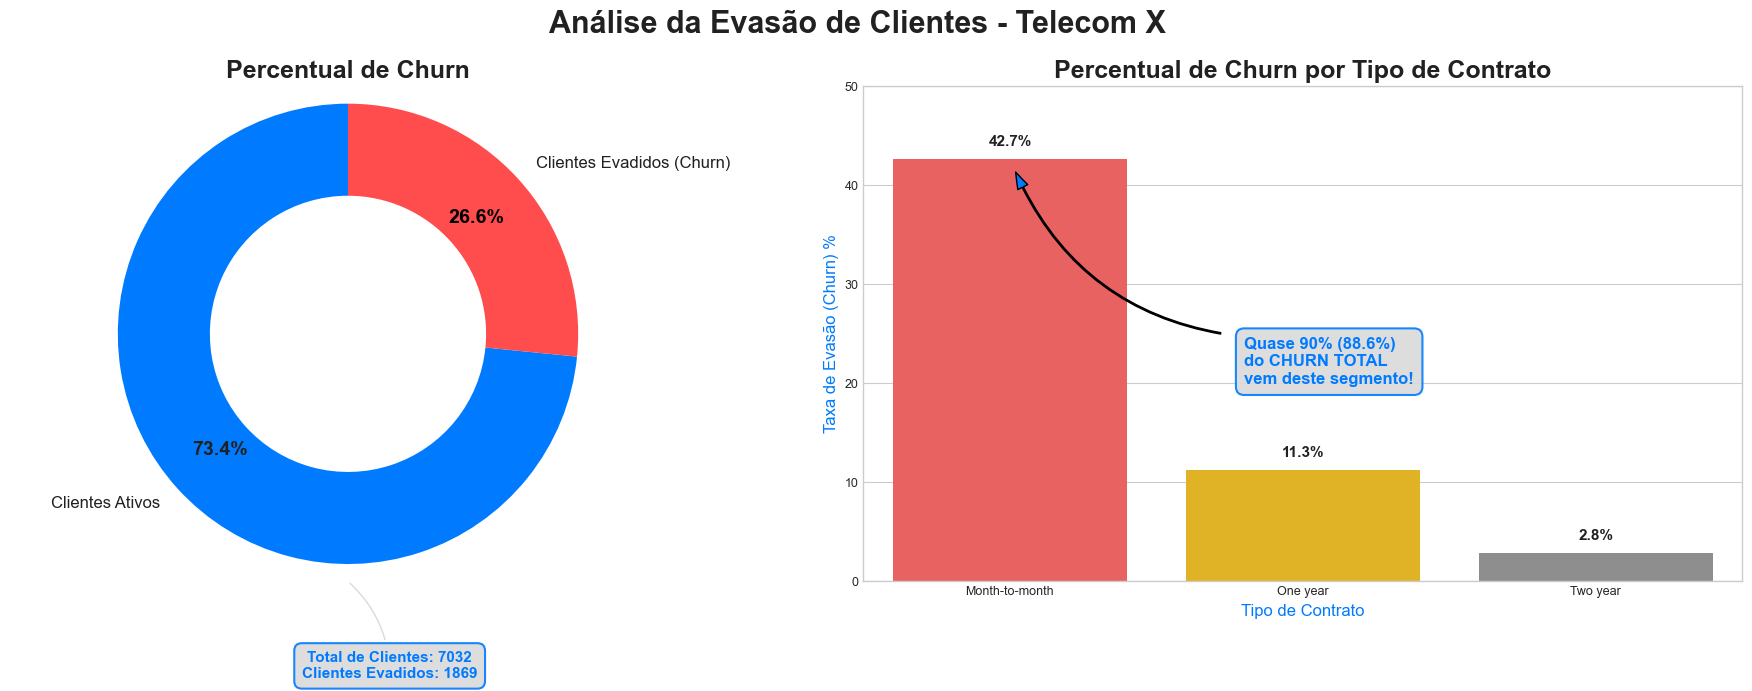

In [7]:

# ======================= CONFIGURAÇÃO DOS DADOS =======================

# --- Dados para o Gráfico de Rosca ---
churn_counts = df_final['Churn'].value_counts()
churn_proportions = df_final['Churn'].value_counts(normalize=True) * 100

labels_donut = ['Clientes Ativos', 'Clientes Evadidos (Churn)']
sizes_donut = [churn_proportions['No'], churn_proportions['Yes']]
colors_donut = [
    get_palette_color('primary_blue'),
    get_palette_color('churn_red')
]

# --- Dados para o Gráfico de Barras ---
churn_rate_by_contract = (
    df_final.groupby('Contract', observed=False)['Churn']
    .value_counts(normalize=True)
    .unstack() * 100
)

churn_rate_yes = churn_rate_by_contract['Yes'].reset_index()
churn_rate_yes.columns = ['Contract', 'Churn_Rate']
churn_rate_yes = churn_rate_yes.sort_values(by='Churn_Rate', ascending=False)

# Cores Condicionais
colors_bar = [
    get_palette_color('churn_red') if contract == 'Month-to-month'
    else get_palette_color('attention_yellow') if contract == 'One year'
    else get_palette_color('neutral_gray')
    for contract in churn_rate_yes['Contract']
]

# --- Cálculo do Impacto ---
total_churners = df_final[df_final['Churn'] == 'Yes'].shape[0]
m2m_churners = df_final.query("Churn == 'Yes' and Contract == 'Month-to-month'").shape[0]
percentage_m2m_of_total_churn = (m2m_churners / total_churners) * 100


# ======================= CONSTRUÇÃO DOS GRÁFICOS =======================

fig, axes = plt.subplots(1, 2, figsize=(18, 7), gridspec_kw={'width_ratios': [1, 1.3]})

# === Gráfico de Rosca ===
wedges, texts, autotexts = axes[0].pie(
    sizes_donut,
    labels=labels_donut,
    autopct='%1.1f%%',
    colors=colors_donut,
    startangle=90,
    wedgeprops=dict(width=0.4),
    pctdistance=0.75
)

# Estilo dos percentuais dentro da rosca
for autotext in autotexts:
    is_churn = autotext.get_text() == f"{churn_proportions['Yes']:.1f}%"
    autotext.set(fontsize=14, fontweight='bold',
                 color=get_palette_color('white_text') if is_churn else get_palette_color('dark_text'))

# Estilo dos labels externos
for text in texts:
    text.set(fontsize=12, color=get_palette_color('dark_text'))

axes[0].set_title('Percentual de Churn', fontsize=18, fontweight='bold', color=get_palette_color('dark_text'))
axes[0].axis('equal')

# === Anotação no Gráfico de Rosca ===
total_clientes = df_final.shape[0]
clientes_cancelados = churn_counts.get('Yes', 0)

message_text = f"Total de Clientes: {total_clientes}\nClientes Evadidos: {clientes_cancelados}"

axes[0].annotate(
    message_text,
    xy=(0.5, 0), xycoords='axes fraction',
    xytext=(30, -50), textcoords='offset points',
    fontsize=11, fontweight='bold',
    color=get_palette_color('primary_blue'),
    ha='center', va='top',
    bbox=dict(boxstyle="round,pad=0.5", fc=get_palette_color('border_gray'),
              ec=get_palette_color('primary_blue'), lw=1.5, alpha=0.9),
    arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0.2",
                    color=get_palette_color('border_gray'))
)

# === Gráfico de Barras ===
sns.barplot(
    x='Contract', y='Churn_Rate', data=churn_rate_yes,
    palette=colors_bar, ax=axes[1], hue='Contract', legend=False
)

axes[1].set_title('Percentual de Churn por Tipo de Contrato', fontsize=18, fontweight='bold', color=get_palette_color('dark_text'))
axes[1].set_xlabel('Tipo de Contrato', fontsize=12, color=get_palette_color('primary_blue'))
axes[1].set_ylabel('Taxa de Evasão (Churn) %', fontsize=12, color=get_palette_color('primary_blue'))
axes[1].set_ylim(0, 50)

# Adicionar os valores nas barras
for index, row in churn_rate_yes.iterrows():
    axes[1].text(
        index, row['Churn_Rate'] + 1, f"{row['Churn_Rate']:.1f}%",
        ha="center", va='bottom',
        fontsize=11, fontweight='bold',
        color=get_palette_color('dark_text')
    )

# === Anotação Estratégica ===
m2m_pos = churn_rate_yes[churn_rate_yes['Contract'] == 'Month-to-month'].index[0]
m2m_val = churn_rate_yes.loc[m2m_pos, 'Churn_Rate']

axes[1].annotate(
    f'Quase 90% ({percentage_m2m_of_total_churn:.1f}%)\ndo CHURN TOTAL\nvem deste segmento!',
    xy=(m2m_pos, m2m_val),
    xytext=(m2m_pos + 0.8, m2m_val - 18),
    arrowprops=dict(facecolor=get_palette_color('primary_blue'),
                    shrink=0.05, width=1, headwidth=8,
                    connectionstyle="arc3,rad=-0.3"),
    fontsize=12, fontweight='bold',
    color=get_palette_color('primary_blue'),
    ha='left', va='top',
    bbox=dict(boxstyle="round,pad=0.5", fc=get_palette_color('border_gray'),
              ec=get_palette_color('primary_blue'), lw=1.5, alpha=0.9)
)

# === Layout Final ===
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.suptitle(
    'Análise da Evasão de Clientes - Telecom X',
    fontsize=22, fontweight='bold',
    color=get_palette_color('dark_text'), y=0.98
)
plt.show()


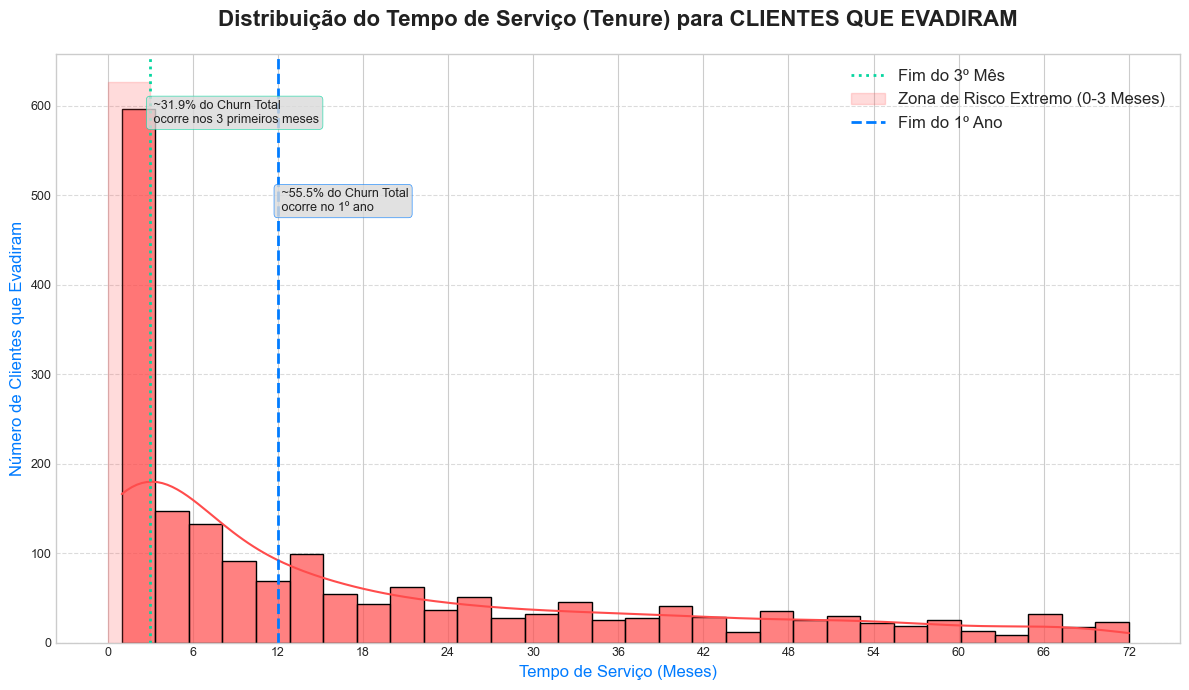

In [8]:
# --- Bloco do Gráfico de Distribuição de Tenure ---

# Filtrar apenas os clientes que evadiram (Churn = 'Yes')
df_churned = df_final[df_final['Churn'] == 'Yes']

plt.figure(figsize=(12, 7))
sns.histplot(data=df_churned, x='tenure', bins=30, kde=True,
             color=get_palette_color('churn_red'), alpha=0.7)

# Calcular percentagens para anotações
total_churners = len(df_churned)
churners_0_3_months = df_churned[df_churned['tenure'] <= 3].shape[0]
percent_churn_0_3_months = (churners_0_3_months / total_churners) * 100

churners_0_12_months = df_churned[df_churned['tenure'] <= 12].shape[0]
percent_churn_0_12_months = (churners_0_12_months / total_churners) * 100

# Adicionar linha e área para os primeiros 3 meses (zona de risco extremo)
plt.axvline(x=3, color=get_palette_color('success_green'), linestyle=':', linewidth=2, label='Fim do 3º Mês')
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=0, x2=3,
                  color=get_palette_color('churn_red'), alpha=0.2,
                  label='Zona de Risco Extremo (0-3 Meses)')

# Adicionar linha para 12 meses
plt.axvline(x=12, color=get_palette_color('primary_blue'), linestyle='--', linewidth=2, label='Fim do 1º Ano')

# Posicionar as anotações inteligentemente
max_y_val = plt.gca().get_ylim()[1]

# Anotação para 0-3 meses
plt.text(x=3, y=max_y_val * 0.9,
         s=f' ~{percent_churn_0_3_months:.1f}% do Churn Total\n ocorre nos 3 primeiros meses',
         color=get_palette_color('dark_text'),
         ha='left', va='center',
         bbox=dict(boxstyle="round,pad=0.3", fc=get_palette_color('border_gray'),
                   ec=get_palette_color('success_green'), lw=0.5, alpha=0.8),
         fontsize=9)

# Anotação para 0-12 meses (ajustar posição para não sobrepor)
plt.text(x=12, y=max_y_val * 0.75,
         s=f' ~{percent_churn_0_12_months:.1f}% do Churn Total\n ocorre no 1º ano',
         color=get_palette_color('dark_text'),
         ha='left', va='center',
         bbox=dict(boxstyle="round,pad=0.3", fc=get_palette_color('border_gray'),
                   ec=get_palette_color('primary_blue'), lw=0.5, alpha=0.8),
         fontsize=9)


plt.title('Distribuição do Tempo de Serviço (Tenure) para CLIENTES QUE EVADIRAM',
          fontsize=16, weight='bold', pad=20, color=get_palette_color('dark_text'))
plt.xlabel('Tempo de Serviço (Meses)', fontsize=12, color=get_palette_color('primary_blue'))
plt.ylabel('Número de Clientes que Evadiram', fontsize=12, color=get_palette_color('primary_blue'))
plt.xticks(range(0, int(df_final['tenure'].max()) + 1, 6))
plt.legend(loc='upper right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

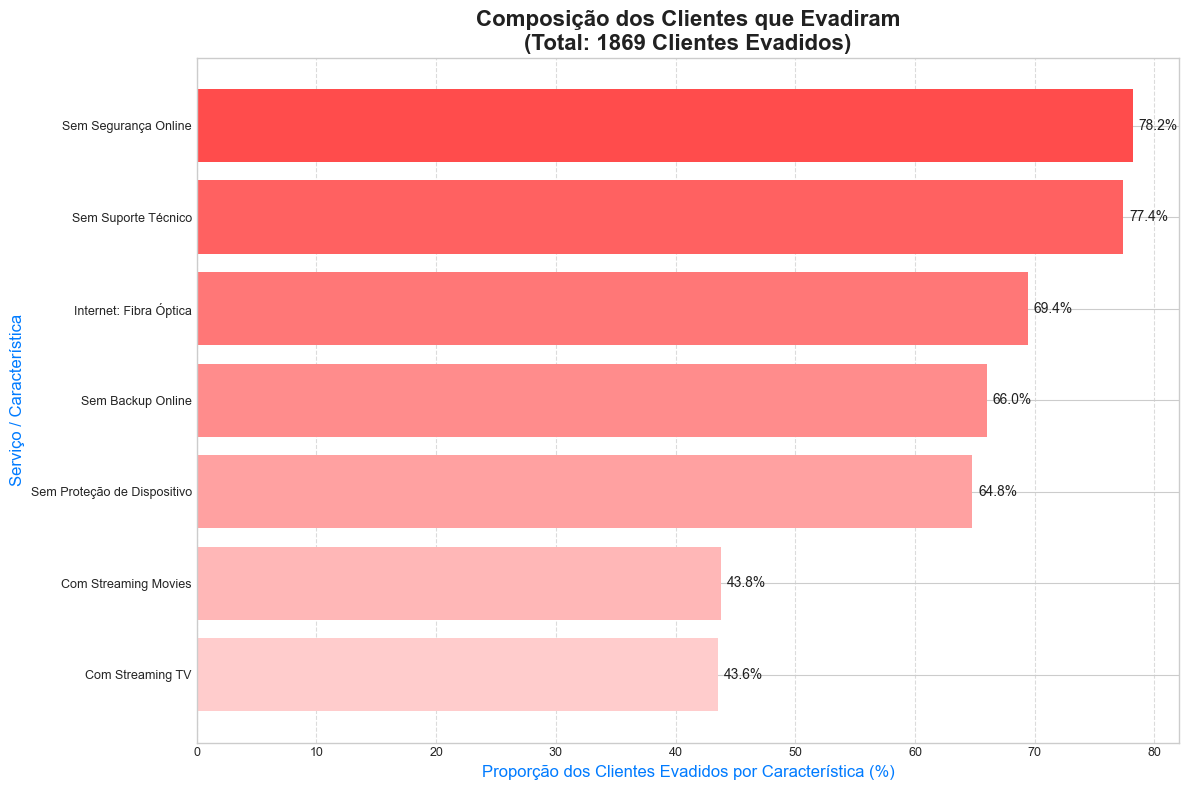

In [9]:
# Total de clientes evadidos
total_churn = df_churned.shape[0]

# Mapeando características específicas
caracteristicas = {
    'Sem Suporte Técnico': (df_churned['TechSupport'] == 'No'),
    'Sem Segurança Online': (df_churned['OnlineSecurity'] == 'No'),
    'Sem Backup Online': (df_churned['OnlineBackup'] == 'No'),
    'Sem Proteção de Dispositivo': (df_churned['DeviceProtection'] == 'No'),
    'Internet: Fibra Óptica': (df_churned['InternetService'] == 'Fiber optic'),
    'Com Streaming TV': (df_churned['StreamingTV'] == 'Yes'),
    'Com Streaming Movies': (df_churned['StreamingMovies'] == 'Yes')
}

# Construindo a tabela de proporção
dados = []
for nome, filtro in caracteristicas.items():
    if total_churn > 0: # Evita divisão por zero se não houver churners
        proporcao = (filtro.sum() / total_churn) * 100
        dados.append({'Serviço / Característica': nome, 'Proporção do Churn Total (%)': proporcao})
    else:
        dados.append({'Serviço / Característica': nome, 'Proporção do Churn Total (%)': 0})


df_chart = pd.DataFrame(dados).sort_values(by='Proporção do Churn Total (%)', ascending=False)


# Plotando o gráfico
plt.figure(figsize=(12, 8)) # Ajuste do tamanho da figura

# Definir o início (vermelho forte) e o fim (vermelho mais claro/cinza avermelhado)
colors_list = [get_palette_color('churn_red'), '#FFCCCC'] # Ex: do vermelho principal para um vermelho bem claro
cmap_custom_red = LinearSegmentedColormap.from_list("my_red_gradient", colors_list)
colors = [cmap_custom_red(x) for x in np.linspace(0, 1, len(df_chart))]


barras = plt.barh(
    df_chart['Serviço / Característica'],
    df_chart['Proporção do Churn Total (%)'],
    color=colors # Agora passamos a lista de cores do degradê
)

# Labels nas barras
for barra in barras:
    largura = barra.get_width()
    plt.text(
        largura + 0.5, # Posição X (um pouco à direita da barra)
        barra.get_y() + barra.get_height() / 2, # Posição Y (centro da barra)
        f'{largura:.1f}%',
        va='center', # Alinhamento vertical
        ha='left',   # Alinhamento horizontal
        fontsize=10,
        color=get_palette_color('dark_text') # Cor do texto do label
    )

# Ajustes do gráfico
plt.xlabel('Proporção dos Clientes Evadidos por Característica (%)', fontsize=12, color=get_palette_color('primary_blue'))
plt.ylabel('Serviço / Característica', fontsize=12, color=get_palette_color('primary_blue'))
plt.title(
    f'Composição dos Clientes que Evadiram\n(Total: {total_churn} Clientes Evadidos)',
    fontsize=16, fontweight='bold', color=get_palette_color('dark_text')
)

plt.gca().invert_yaxis() # Inverte o eixo Y para que a maior barra fique no topo
plt.grid(axis='x', linestyle='--', alpha=0.7) # Grade apenas no eixo X para facilitar leitura das proporções
plt.tight_layout()
plt.show()

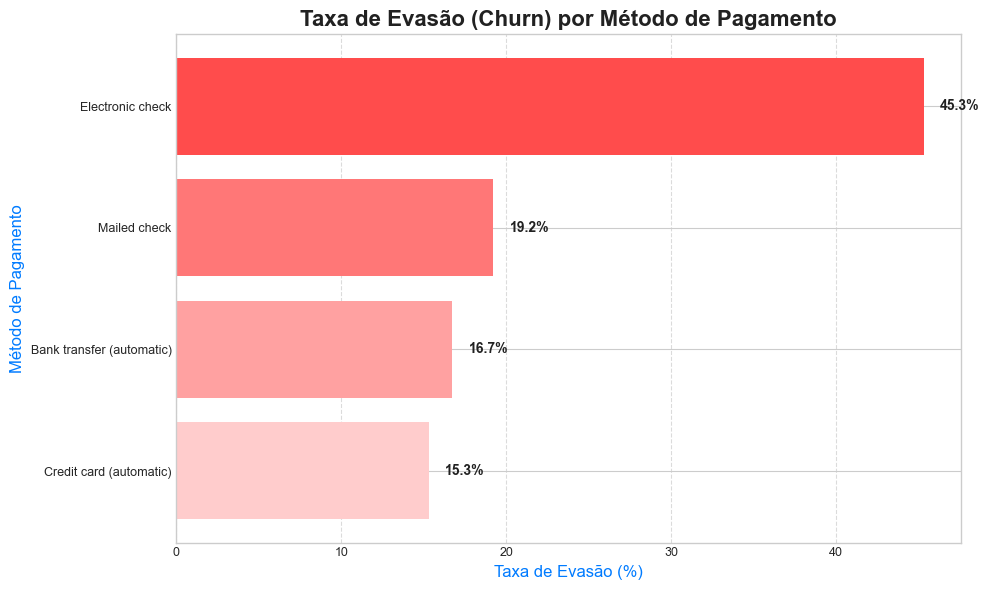

In [10]:
# Gerador de degradê com base nos valores
def generate_degrade_palette(start_color, end_color, n_colors):
    """
    Gera uma lista de cores em degradê.
    A cor mais próxima de 'start_color' será para o primeiro item
    (o maior valor, se os dados estiverem ordenados descendentemente).
    """
    cmap = LinearSegmentedColormap.from_list("custom_degrade", [start_color, end_color])
    # Linspace de 0 a 1 garante que o primeiro item recebe start_color
    # e o último item recebe end_color.
    # Como o DataFrame é sorted_values(ascending=False), o maior valor está no início.
    return [cmap(x) for x in np.linspace(0, 1, n_colors)]


# Dados como DataFrame
df = pd.DataFrame({
    'PaymentMethod': ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'],
    'ChurnRate': [45.3, 19.2, 16.7, 15.3]
})

# IMPORTANTE: Ordenar do MAIOR para o MENOR para que a maior barra fique no topo
# antes de inverter o eixo Y, fazendo-a descer para a base.
df = df.sort_values(by='ChurnRate', ascending=False) # <--- MUDANÇA AQUI!

# Identifica o método com maior churn (agora é o primeiro após a ordenação decrescente)
highest_churn_method = df.iloc[0]['PaymentMethod']

# Define ordem dos métodos e valores
order_payment = df['PaymentMethod'].tolist()
churn_rate_payment_values = df['ChurnRate'].tolist()

# Gerar as cores para as barras
# start_color (vermelho forte) será para o maior churn (primeiro item na lista)
# end_color (vermelho claro) será para o menor churn (último item na lista)
colors_for_bars = generate_degrade_palette(
    start_color=get_palette_color('churn_red'),      # Cor mais forte para o MAIOR churn
    end_color=get_palette_color('light_red_degrade'), # Cor mais clara para o MENOR churn
    n_colors=len(churn_rate_payment_values)           # Número correto de cores
)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
# Usando colors_for_bars, que foi gerado corretamente
bars = ax.barh(order_payment, churn_rate_payment_values, color=colors_for_bars)

# Labels nas barras
for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{width:.1f}%', va='center', ha='left', fontsize=10, fontweight='bold',
            color=get_palette_color('dark_text')) # Usando 'dark_text' da sua paleta

# Estilo
ax.set_title('Taxa de Evasão (Churn) por Método de Pagamento', fontsize=16, weight='bold', color=get_palette_color('dark_text'))
ax.set_xlabel('Taxa de Evasão (%)', fontsize=12, color=get_palette_color('primary_blue'))
ax.set_ylabel('Método de Pagamento', fontsize=12, color=get_palette_color('primary_blue'))
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().invert_yaxis() # Inverte o eixo Y para a maior barra ficar na base!

plt.tight_layout()
plt.show()

In [11]:
# Dicionário de características para analisar e seus valores de alto risco
# Agora referenciamos 'SeniorCitizen_Cat' e seus valores 'Sim'/'Não'
demographic_features = {
    'SeniorCitizen_Cat': 'Sim', # SeniorCitizen_Cat como 'Sim' para idosos
    'Partner': 'No',
    'Dependents': 'No',
    'PaperlessBilling': 'Yes'
}

data_for_chart = []

for feature, risky_value in demographic_features.items():
    # Identificar o valor "seguro" (oposto)
    if feature == 'SeniorCitizen_Cat':
        safe_value = 'Não'
        risky_label_suffix = '(Sim)'
        safe_label_suffix = '(Não)'
    elif risky_value == 'No': # Para Partner, Dependents
        safe_value = 'Yes'
        risky_label_suffix = '(Não)'
        safe_label_suffix = '(Sim)'
    else: # Para PaperlessBilling
        safe_value = 'No'
        risky_label_suffix = '(Sim)'
        safe_label_suffix = '(Não)'

    # Calcular a taxa de churn para o valor de alto risco
    total_risky = df_final[df_final[feature] == risky_value].shape[0]
    churn_risky = df_final[(df_final[feature] == risky_value) & (df_final['Churn'] == 'Yes')].shape[0]
    churn_rate_risky = (churn_risky / total_risky) * 100 if total_risky > 0 else 0

    # Calcular a taxa de churn para o valor "seguro"
    total_safe = df_final[df_final[feature] == safe_value].shape[0]
    churn_safe = df_final[(df_final[feature] == safe_value) & (df_final['Churn'] == 'Yes')].shape[0]
    churn_rate_safe = (churn_safe / total_safe) * 100 if total_safe > 0 else 0


    # Adicionar ao dataset para o gráfico
    # Mapeamento para nomes descritivos no gráfico
    feature_base_name_map = { # Nomes base sem o "(Sim)/(Não)"
        'SeniorCitizen_Cat': 'Clientes Idosos',
        'Partner': 'Parceiro',
        'Dependents': 'Dependentes',
        'PaperlessBilling': 'Faturamento Sem Papel'
    }

    data_for_chart.append({
        'Característica': f"{feature_base_name_map[feature]} {risky_label_suffix}", # Ex: "Clientes Idosos (Sim)"
        'Taxa de Churn (%)': churn_rate_risky,
        'Tipo': 'Alto Risco'
    })
    data_for_chart.append({
        'Característica': f"{feature_base_name_map[feature]} {safe_label_suffix}", # Ex: "Clientes Idosos (Não)"
        'Taxa de Churn (%)': churn_rate_safe,
        'Tipo': 'Menor Risco'
    })

df_chart_demog = pd.DataFrame(data_for_chart)

# Ordenar para visualização: agrupar por característica e depois por tipo de risco
# Para garantir que "Clientes Idosos (Sim)" venha antes de "Clientes Idosos (Não)" etc.
df_chart_demog['OrderKey'] = df_chart_demog['Característica'].apply(
    lambda x: 0 if 'Idosos' in x else (1 if 'Parceiro' in x else (2 if 'Dependentes' in x else 3))
)
# Ordernar por OrderKey e, dentro de cada grupo, pelo Tipo (Alto Risco antes de Menor Risco)
df_chart_demog = df_chart_demog.sort_values(by=['OrderKey', 'Tipo'], ascending=[True, False]).drop(columns='OrderKey')


plt.figure(figsize=(12, 8))
# Usaremos cores diferentes para alto risco e menor risco
palette_demog = {
    'Alto Risco': get_palette_color('churn_red'),
    'Menor Risco': get_palette_color('primary_blue')
}

sns.barplot(x='Taxa de Churn (%)', y='Característica', data=df_chart_demog,
            palette=palette_demog,
            hue='Tipo',
            dodge=False)

# Adicionar labels percentuais nas barras
for container in plt.gca().containers:
    for barra in container:
        largura = barra.get_width()
        plt.text(
            largura + 0.5,
            barra.get_y() + barra.get_height() / 2,
            f'{largura:.1f}%',
            va='center',
            ha='left',
            fontsize=9,
            color=get_palette_color('dark_text')
        )

plt.title('Taxa de Evasão (Churn) por Perfis Demográficos e Faturamento',
          fontsize=16, fontweight='bold', color=get_palette_color('dark_text'))
plt.xlabel('Taxa de Evasão (Churn) %', fontsize=12, color=get_palette_color('primary_blue'))
plt.ylabel('Característica do Cliente', fontsize=12, color=get_palette_color('primary_blue'))
plt.xlim(0, df_chart_demog['Taxa de Churn (%)'].max() * 1.15)
plt.legend(title='Grupo de Risco', loc='lower right', frameon=True, facecolor=get_palette_color('neutral_gray'), edgecolor=get_palette_color('border_gray'))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

KeyError: 'SeniorCitizen_Cat'

# 📄Relatorio Final

## Projeto Telecom X: Análise de Evasão de Clientes (Churn)

## Sumário Executivo para Liderança

Este relatório apresenta os principais insights derivados de uma análise exploratória de dados (EDA) aprofundada sobre a evasão de clientes (churn) na Telecom X. Nosso objetivo é identificar os fatores mais críticos que contribuem para o abandono dos serviços por parte dos clientes e oferecer recomendações estratégicas acionáveis para a liderança.

---

### **Descobertas Chave da Análise de Churn**

A Telecom X enfrenta uma **taxa de evasão de aproximadamente 26.6%**, o que representa uma perda significativa de receita e base de clientes. Nossa análise revelou que esta evasão é predominantemente influenciada pelos seguintes fatores:

1.  **Vulnerabilidade de Clientes Novos:**
    * **Quase metade (47.7%) dos clientes evadem nos primeiros 12 meses de serviço.** A lealdade do cliente aumenta exponencialmente com o tempo de permanência, indicando que os primeiros meses são cruciais para a retenção.

2.  **Contratos Mensais como Principal Gatilho de Churn:**
    * Clientes com **contrato `Mês-a-Mês` apresentam uma taxa de evasão alarmante de 42.7%**. Em contraste, contratos de um ano (11.3%) e, especialmente, de dois anos (2.9%) demonstram alta retenção.

3.  **Qualidade e Satisfação com o Serviço de Internet:**
    * O serviço de **`Fibra Óptica` está associado a uma alta taxa de churn (41.9%)**, significativamente maior que o serviço DSL. Isso sugere problemas de qualidade, desempenho ou expectativas não atendidas com a Fibra.
    * A **ausência de serviços adicionais como `Suporte Técnico` (42.2% de churn) e `Segurança Online` (41.8% de churn)**, `Backup Online` e `Proteção de Dispositivo` são fortes indicadores de evasão. Clientes que não utilizam esses serviços adicionais tendem a evadir muito mais.
    * Curiosamente, clientes que utilizam serviços de `Streaming TV` ou `Streaming Movies` também apresentam taxas de churn elevadas (aproximadamente 40%), o que pode indicar insatisfação com a qualidade ou valor desses serviços.

4.  **Problemas no Método de Pagamento "Cheque Eletrônico":**
    * Clientes que utilizam o **`Cheque Eletrônico` como método de pagamento exibem a maior taxa de churn (45.3%)** entre todas as opções.

5.  **Perfis Demográficos com Maiores Riscos:**
    * **Clientes idosos (`SeniorCitizen=1`) têm uma taxa de churn de 41.7%**, superior aos não-idosos.
    * Clientes **sem parceiro (`Partner=No`) ou dependentes (`Dependents=No`)** também são mais propensos à evasão (aproximadamente 32% de churn para ambos).
    * A opção por `Faturamento Sem Papel` (`PaperlessBilling=Yes`) também está associada a uma maior taxa de churn (33.8%).

### **Recomendações Estratégicas e Próximos Passos**

Com base nesses insights, sugerimos as seguintes ações prioritárias para mitigar a evasão de clientes:

1.  **Programa de Retenção para Clientes Novos:**
    * Desenvolver e implementar um **programa de onboarding e acompanhamento proativo** para clientes nos primeiros 12 meses de serviço, com foco em garantir a satisfação e resolver rapidamente quaisquer problemas iniciais.
    * Oferecer **incentivos atrativos para a conversão de contratos mensais para anuais** logo no início do relacionamento.

2.  **Estratégia de Contratos e Incentivos à Fidelização:**
    * Criar **campanhas agressivas para promover a migração de contratos `Mês-a-Mês` para planos de longo prazo** (um ou dois anos), destacando benefícios exclusivos e descontos substanciais.

3.  **Revisão e Melhoria dos Serviços de Internet e Adicionais:**
    * **Urgência na investigação e otimização do serviço de `Fibra Óptica`**, incluindo análise de desempenho, suporte e satisfação do cliente.
    * **Intensificar a promoção e o valor dos serviços de `Suporte Técnico`, `Segurança Online`, `Backup Online` e `Proteção de Dispositivo`**, destacando como esses serviços contribuem para uma experiência sem preocupações e aumentam a lealdade.
    * **Investigar a satisfação e o custo-benefício dos serviços de `Streaming` (TV/Filmes)** para entender por que estão associados a maior churn.

4.  **Otimização do Processo de Pagamento:**
    * Realizar uma auditoria detalhada da experiência do usuário com o método de **`Cheque Eletrônico`**, buscando falhas e oportunidades de melhoria ou incentivando a migração para métodos de pagamento mais estáveis e satisfatórios.

5.  **Segmentação e Campanha de Retenção:**
    * Desenvolver **campanhas de retenção personalizadas para segmentos de alto risco**, como clientes idosos e aqueles sem parceiro/dependentes, abordando suas necessidades e preocupações específicas.

---

### **Próximos Passos na Análise de Dados:**

Para aprofundar a análise do churn e identificar tendências mais claras, bem como a qualidade dos serviços que podem estar impactando a decisão de evasão dos clientes, **sugere-se a coleta e disponibilização das seguintes informações adicionais no conjunto de dados:**

1.  **Dados de Linha do Tempo (Série Temporal):**
    * **Data de Início do Contrato (`ContractStartDate`):** Uma data precisa do momento em que o cliente iniciou seu serviço. Isso nos permitiria calcular a `ChurnDate` para clientes que evadiram (somando o `tenure` à `ContractStartDate`) e, assim, plotar o número de churns por mês/trimestre, revelando padrões e tendências de evasão ao longo do tempo real.
    * **Período de Referência da Medição de Churn:** Se o `df_final` representa um snapshot, é importante saber o período que os dados cobrem e como o churn foi medido (ex: churn no último mês, churn total na vida do cliente até a data de extração).

2.  **Dados de Qualidade de Serviço e Interação do Cliente:**
    * **Histórico de Atendimento ao Cliente:** Número de chamadas de suporte, tempo médio de resolução, satisfação pós-atendimento.
    * **Interrupções de Serviço:** Registros de interrupções de internet/telefone/TV, duração e frequência.
    * **Reclamações Registradas:** Detalhes e categorias das reclamações.
    * **Pesquisas de Satisfação do Cliente (NPS, CSAT):** Pontuações e feedback qualitativo coletados periodicamente.
    * **Uso do Serviço:** Dados mais granulares sobre o uso (ex: consumo de dados de internet, minutos de ligação, canais de TV mais assistidos) poderiam revelar insatisfação com a performance ou adequação do plano.

* **Desenvolvimento de um Modelo Preditivo de Churn:** Utilizar as variáveis identificadas como cruciais para construir um modelo de Machine Learning capaz de prever quais clientes têm maior probabilidade de evadir, permitindo ações proativas de retenção.
* **Análise de Rentabilidade:** Integrar dados de custo e receita para calcular o valor vitalício do cliente (LTV) e priorizar esforços de retenção com base no potencial de retorno financeiro.